In [1]:
path ="/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV";
include(join([pwd(), "/function_library/file_modules.jl"]))
refresh_tools("function_library")
saveDataPath ="/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5_day13_juliadata";
figurePath = "/Users/lilis/Dropbox (MIT)/GitHub/mouse-behavior-arduino/JuiaLanguage-Gen/";
data = extract_data(path);

Refreshed cluster_modules.jl feedback_modules.jl file_modules.jl math_modules.jl modeling_tools.jl plotting_tools.jl probabilistic_modules.jl 

# Cross-validation tools and testing

First, we will write general methods for crossvalidating GIVEN a vector of k-sets

Be sure to save each k-set df as its own CSV to avoid headaches in the fitting folder

### Methods to generate k-fold sets from a larger df

given the df with all the data, split into k-sets

In [2]:
using Random

In [3]:
ENV["COLUMNS"] = 1000
b5d13_norm_df_m150 = importDataFrame("/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/B5_d13_norm_df_truncated150beforelick2021-01-20_1903.csv")
# typeof(b5d13_norm_df_m150csv)

********************************************************************************************
********************************************************************************************
Loading... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/B5_d13_norm_df_truncated150beforelick2021-01-20_1903.csv


,DataID,TrialNo,X,Y,LickTime,Time2Lick,PcInterval,LickTime_1back,LickTime_2back,Rxn_1back,Early_1back,Reward_1back,ITI_1back,Rxn_2back,Early_2back,Reward_2back,ITI_2back,LickState,Yshuffle,SessionCode,Path
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Float64,String,String
1,1,1,0.0,0.164951,0.0752584,0.0745934,0.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0.26008,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
2,2,1,0.01,0.164327,0.0752584,0.0739713,0.0074129,1.0,1.0,0,0,0,0,0,0,0,0,0,0.152353,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
3,3,1,0.02,0.163875,0.0752584,0.0733492,0.0148258,1.0,1.0,0,0,0,0,0,0,0,0,0,0.158888,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
4,4,1,0.03,0.163799,0.0752584,0.072727,0.0222387,1.0,1.0,0,0,0,0,0,0,0,0,0,0.368562,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
5,5,1,0.04,0.164287,0.0752584,0.0721049,0.0296516,1.0,1.0,0,0,0,0,0,0,0,0,0,0.204119,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
6,6,1,0.05,0.165665,0.0752584,0.0714828,0.0370645,1.0,1.0,0,0,0,0,0,0,0,0,0,0.310246,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
7,7,1,0.06,0.16814,0.0752584,0.0708607,0.0444774,1.0,1.0,0,0,0,0,0,0,0,0,0,0.46767,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
8,8,1,0.07,0.172051,0.0752584,0.0702385,0.0518903,1.0,1.0,0,0,0,0,0,0,0,0,0,0.20209,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
9,9,1,0.08,0.177524,0.0752584,0.0696164,0.0593032,1.0,1.0,0,0,0,0,0,0,0,0,0,0.451946,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV


In [113]:
# b5d13_norm_df_m150 = unwrap_CSV_modelresult("/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/B5_d13_norm_df_truncated150beforelick2021-01-20_1903.csv")

In [128]:
b5d13_norm_df_m150[1,:]

,DataID,TrialNo,X,Y,LickTime,Time2Lick,PcInterval,LickTime_1back,LickTime_2back,Rxn_1back,Early_1back,Reward_1back,ITI_1back,Rxn_2back,Early_2back,Reward_2back,ITI_2back,LickState,Yshuffle,SessionCode,Path
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Float64,String,String
1,1,1,0.0,0.164951,0.0752584,0.0745934,0.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0.26008,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV


In [118]:
typeof(b5d13_norm_df_m150[1:1])

DataFrame

In [4]:
function make_k_fold_sets(alldata_df; k=10, savedir=pwd(), expname="kfolds")
    curr_dir = pwd()
    cd(savedir)
    # create a save folder
    expname = join([expname, timestamp_now()])
    try 
        cd(expname)
    catch
        mkdir(expname)
        cd(expname)
    end    
    try
        # Save the full dataset here, too
        saveDataFrame(alldata_df, "All_Data", path=pwd())
        shuffleidxs = randperm(nrow(alldata_df))
        n_per_set = floor(Int, nrow(alldata_df)/k)
        ksets = []
        for i = 1:k
            idxs = shuffleidxs[1+(i-1)*(n_per_set):i*n_per_set]
            push!(ksets, alldata_df[idxs,:])
            filename = join(["k_fold_dataset", i])
            println(filename)
            saveDataFrame(alldata_df[idxs,:], filename, path=pwd())
        end
        fitdir = pwd()
        cd(curr_dir)
        println("k-sets saved as CSV to ", fitdir)
        return (ksets, fitdir)
    catch
        cd(curr_dir)
        rethrow()
    end
end

make_k_fold_sets (generic function with 1 method)

In [244]:
(ksets, savedir)=make_k_fold_sets(b5d13_norm_df_m150; k=10, savedir=pwd(), expname="b5d13_10k-folds");

saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_10k-folds2021-01-21_1627/All_Data2021-01-21_1627.csv
k_fold_dataset1
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_10k-folds2021-01-21_1627/k_fold_dataset12021-01-21_1627.csv
k_fold_dataset2
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_10k-folds2021-01-21_1627/k_fold_dataset22021-01-21_1627.csv
k_fold_dataset3
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_10k-folds2021-01-21_1627/k_fold_dataset32021-01-21_1627.csv
k_fold_dataset4
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_10k-folds2021-01-21_1627/k_fold_dataset42021-01-21_1627.csv
k_fold_dataset5
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_10k-folds2021-0

In [72]:
(ksets, savedir)=make_k_fold_sets(b5d13_norm_df_m150; k=1000, savedir=pwd(), expname="b5d13_1000k-folds");

saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/All_Data2021-01-20_2051.csv
k_fold_dataset1
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset12021-01-20_2051.csv
k_fold_dataset2
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset22021-01-20_2051.csv
k_fold_dataset3
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset32021-01-20_2051.csv
k_fold_dataset4
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset42021-01-20_2051.csv
k_fold_dataset5
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k

k_fold_dataset92
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset922021-01-20_2051.csv
k_fold_dataset93
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset932021-01-20_2051.csv
k_fold_dataset94
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset942021-01-20_2051.csv
k_fold_dataset95
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset952021-01-20_2051.csv
k_fold_dataset96
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset962021-01-20_2051.csv
k_fold_dataset97
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLangua

/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset1862021-01-20_2051.csv
k_fold_dataset187
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset1872021-01-20_2051.csv
k_fold_dataset188
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset1882021-01-20_2051.csv
k_fold_dataset189
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset1892021-01-20_2051.csv
k_fold_dataset190
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset1902021-01-20_2051.csv
k_fold_dataset191
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Mo

k_fold_dataset237
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset2372021-01-20_2051.csv
k_fold_dataset238
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset2382021-01-20_2051.csv
k_fold_dataset239
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset2392021-01-20_2051.csv
k_fold_dataset240
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset2402021-01-20_2051.csv
k_fold_dataset241
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset2412021-01-20_2051.csv
k_fold_dataset242
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/

/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset2922021-01-20_2051.csv
k_fold_dataset293
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset2932021-01-20_2051.csv
k_fold_dataset294
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset2942021-01-20_2051.csv
k_fold_dataset295
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset2952021-01-20_2051.csv
k_fold_dataset296
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset2962021-01-20_2051.csv
k_fold_dataset297
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Mo

k_fold_dataset348
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset3482021-01-20_2051.csv
k_fold_dataset349
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset3492021-01-20_2051.csv
k_fold_dataset350
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset3502021-01-20_2051.csv
k_fold_dataset351
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset3512021-01-20_2051.csv
k_fold_dataset352
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset3522021-01-20_2051.csv
k_fold_dataset353
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/

k_fold_dataset404
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset4042021-01-20_2051.csv
k_fold_dataset405
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset4052021-01-20_2051.csv
k_fold_dataset406
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset4062021-01-20_2051.csv
k_fold_dataset407
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset4072021-01-20_2051.csv
k_fold_dataset408
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset4082021-01-20_2051.csv
k_fold_dataset409
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/

k_fold_dataset455
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset4552021-01-20_2051.csv
k_fold_dataset456
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset4562021-01-20_2051.csv
k_fold_dataset457
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset4572021-01-20_2051.csv
k_fold_dataset458
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset4582021-01-20_2051.csv
k_fold_dataset459
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset4592021-01-20_2051.csv
k_fold_dataset460
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/

/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset5102021-01-20_2051.csv
k_fold_dataset511
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset5112021-01-20_2051.csv
k_fold_dataset512
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset5122021-01-20_2051.csv
k_fold_dataset513
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset5132021-01-20_2051.csv
k_fold_dataset514
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset5142021-01-20_2051.csv
k_fold_dataset515
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Mo

/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset5662021-01-20_2051.csv
k_fold_dataset567
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset5672021-01-20_2051.csv
k_fold_dataset568
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset5682021-01-20_2051.csv
k_fold_dataset569
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset5692021-01-20_2051.csv
k_fold_dataset570
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset5702021-01-20_2051.csv
k_fold_dataset571
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Mo

k_fold_dataset636
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset6362021-01-20_2051.csv
k_fold_dataset637
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset6372021-01-20_2051.csv
k_fold_dataset638
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset6382021-01-20_2051.csv
k_fold_dataset639
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset6392021-01-20_2051.csv
k_fold_dataset640
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset6402021-01-20_2051.csv
k_fold_dataset641
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/

k_fold_dataset681
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset6812021-01-20_2051.csv
k_fold_dataset682
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset6822021-01-20_2051.csv
k_fold_dataset683
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset6832021-01-20_2051.csv
k_fold_dataset684
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset6842021-01-20_2051.csv
k_fold_dataset685
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset6852021-01-20_2051.csv
k_fold_dataset686
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/

/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset7362021-01-20_2051.csv
k_fold_dataset737
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset7372021-01-20_2051.csv
k_fold_dataset738
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset7382021-01-20_2051.csv
k_fold_dataset739
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset7392021-01-20_2051.csv
k_fold_dataset740
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset7402021-01-20_2051.csv
k_fold_dataset741
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Mo

/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset7922021-01-20_2051.csv
k_fold_dataset793
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset7932021-01-20_2051.csv
k_fold_dataset794
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset7942021-01-20_2051.csv
k_fold_dataset795
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset7952021-01-20_2051.csv
k_fold_dataset796
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset7962021-01-20_2051.csv
k_fold_dataset797
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Mo

/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset8642021-01-20_2051.csv
k_fold_dataset865
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset8652021-01-20_2051.csv
k_fold_dataset866
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset8662021-01-20_2051.csv
k_fold_dataset867
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset8672021-01-20_2051.csv
k_fold_dataset868
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset8682021-01-20_2051.csv
k_fold_dataset869
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Mo

k_fold_dataset915
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset9152021-01-20_2051.csv
k_fold_dataset916
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset9162021-01-20_2051.csv
k_fold_dataset917
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset9172021-01-20_2051.csv
k_fold_dataset918
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset9182021-01-20_2051.csv
k_fold_dataset919
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset9192021-01-20_2051.csv
k_fold_dataset920
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/

/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset9702021-01-20_2051.csv
k_fold_dataset971
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset9712021-01-20_2051.csv
k_fold_dataset972
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset9722021-01-20_2051.csv
k_fold_dataset973
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset9732021-01-20_2051.csv
k_fold_dataset974
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models/b5d13_1000k-folds2021-01-20_2051/k_fold_dataset9742021-01-20_2051.csv
k_fold_dataset975
saving... 
/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Mo

## Cool. We can now export our k-folds datasets as well as the OG data and keep track of it.

Our next task is to implement the k-folds xvalidation. Let's first check our kfolds datasets

In [143]:
nrow(ksets[1])

12351

In [144]:
ksets[1]

,DataID,TrialNo,X,Y,LickTime,Time2Lick,PcInterval,LickTime_1back,LickTime_2back,Rxn_1back,Early_1back,Reward_1back,ITI_1back,Rxn_2back,Early_2back,Reward_2back,ITI_2back,LickState,Yshuffle,SessionCode,Path
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Float64,String,String
1,86442,452,2.33,0.4382,0.389625,0.241057,0.366658,1.0,0.155977,0,0,0,1,0,1,0,0,0,0.311269,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
2,74648,424,0.19,0.174261,0.265334,0.251067,0.0434226,1.0,0.290096,0,0,0,0,0,0,1,0,0,0.200657,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
3,38645,266,0.99,0.200651,0.160128,0.0970772,0.366612,0.187736,0.166892,0,1,0,0,0,1,0,0,0,0.42779,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
4,92513,471,3.64,0.251543,0.388318,0.158264,0.574685,1.0,0.224984,0,0,0,0,0,0,1,0,0,0.321077,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
5,107225,556,2.35,0.197879,0.399874,0.249966,0.360546,1.0,1.0,0,0,0,0,0,0,0,0,0,0.512793,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
6,62648,373,2.05,0.22057,0.14689,0.0180169,0.823425,0.151047,0.184627,0,1,0,0,0,1,0,0,0,0.196361,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
7,17612,121,0.86,0.337059,0.0567507,0.00275604,0.815707,0.161328,0.00708717,0,1,0,0,1,0,0,0,0,0.319923,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
8,93466,475,1.26,0.253269,0.313754,0.232465,0.244822,1.0,0.113611,0,0,0,0,0,1,0,0,0,0.430152,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
9,40731,276,0.84,0.19725,0.19445,0.140409,0.258708,0.114302,0.181349,0,1,0,0,0,1,0,0,0,0.305585,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV


In [145]:
describe(ksets[1])

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,DataID,61295.7,3,61105.0,123507,,,Int64
2,TrialNo,345.38,1,367.0,621,,,Int64
3,X,2.20408,0.0,1.58,15.83,,,Float64
4,Y,0.303297,0.0074615,0.289208,0.991872,,,Float64
5,LickTime,0.27675,0.00200526,0.213774,1.0,,,Float64
6,Time2Lick,0.137074,0.0,0.0973572,0.988802,,,Float64
7,PcInterval,0.476035,0.0,0.473156,0.987477,,,Float64
8,LickTime_1back,0.356196,0.0,0.174504,1.0,,,Float64
9,LickTime_2back,0.331226,0.0,0.184627,1.0,,,Float64


### Let's make sure we can import the saved data...

In [6]:
function import_kfolds(expdir)
    curr_dir = pwd()
    cd(expdir)    
    try
        # Load full dataset first
        a = readdir()
#         all_id = []
#         k_ids = []
        allset = []
        ksets = []
        for i = 1:length(a)
            if occursin("All_Data", a[i]) && occursin(".csv", a[i])
                push!(allset, importDataFrame(a[i], suppresswarn=true))
                allset = allset[1]
            elseif occursin("k_fold", a[i]) && occursin(".csv", a[i])
                push!(ksets, importDataFrame(a[i], suppresswarn=true))
            end
        end
        cd(curr_dir)
        return (ksets, allset)
    catch
        cd(curr_dir)
        rethrow()
    end
end

import_kfolds (generic function with 1 method)

In [70]:
(ksets_imported, allset) = import_kfolds(savedir);

In [168]:
describe(ksets_imported[1])

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,DataID,61741.5,4,61824.0,123479,,,Int64
2,TrialNo,347.773,1,370.0,621,,,Int64
3,X,2.21142,0.0,1.56,15.84,,,Float64
4,Y,0.304495,0.00012222,0.291315,0.994317,,,Float64
5,LickTime,0.279274,0.00200526,0.213774,1.0,,,Float64
6,Time2Lick,0.139118,1.86639e-5,0.0956152,0.983825,,,Float64
7,PcInterval,0.473397,0.0,0.473985,0.986581,,,Float64
8,LickTime_1back,0.365235,0.0,0.17858,1.0,,,Float64
9,LickTime_2back,0.338465,0.0,0.186631,1.0,,,Float64


In [166]:
describe(allset)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,DataID,61755.5,1,61755.5,123510,,,Int64
2,TrialNo,347.694,1,370.0,621,,,Int64
3,X,2.20079,0.0,1.55,15.92,,,Float64
4,Y,0.303345,0.0,0.290017,1.0,,,Float64
5,LickTime,0.276713,0.0,0.213774,1.0,,,Float64
6,Time2Lick,0.137242,0.0,0.0970244,0.990668,,,Float64
7,PcInterval,0.473716,0.0,0.472312,0.9906,,,Float64
8,LickTime_1back,0.361833,0.0,0.177449,1.0,,,Float64
9,LickTime_2back,0.339061,0.0,0.186631,1.0,,,Float64


In [176]:
size(allset)

(123510, 21)

### Looks good! Now we need to see what the fits look like...

/Users/lilis/Dropbox (MIT)/GitHub/mouse-behavior-arduino/JuiaLanguage-Gen/["fm_k1_DAt2l", "fm_k1_DAt2l"]Results_1_2021-01-20_2054.eps
/Users/lilis/Dropbox (MIT)/GitHub/mouse-behavior-arduino/JuiaLanguage-Gen/["fm_k1_DAt2l", "fm_k1_DAt2l"]Results_2_2021-01-20_2054.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

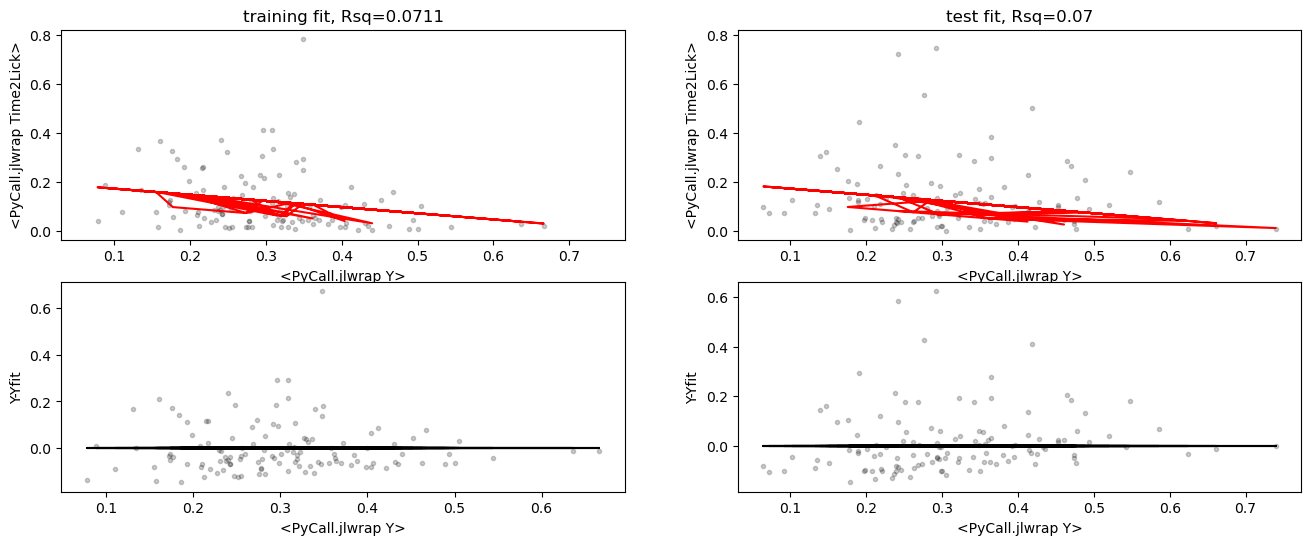

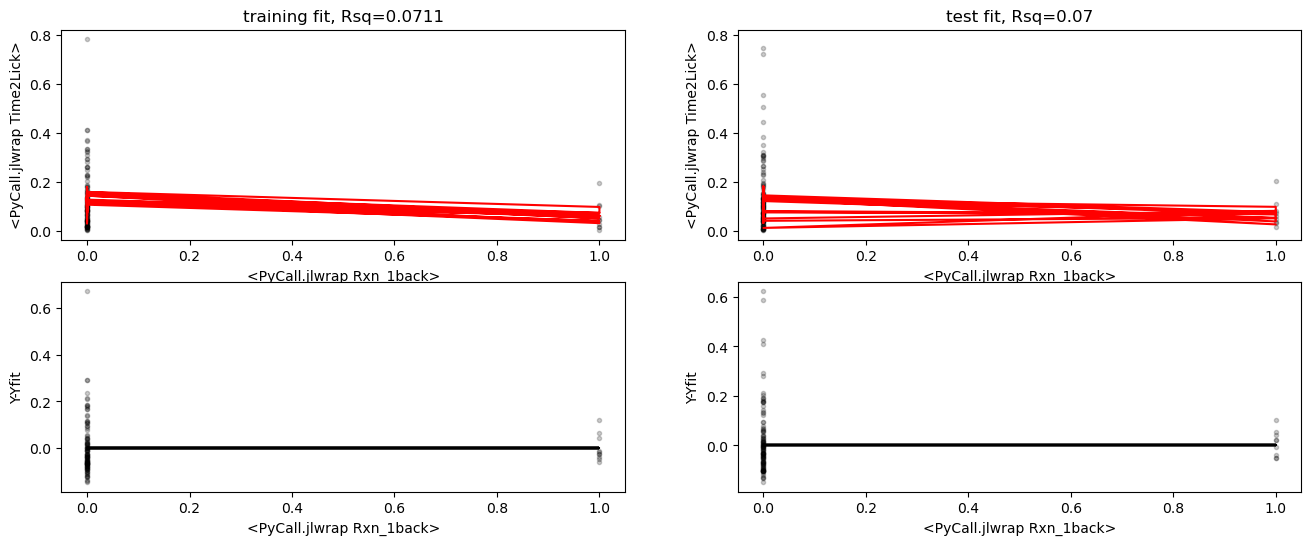

TRAINING
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Normal{Float64},IdentityLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Time2Lick ~ 1 + Y + Rxn_1back

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      z  Pr(>|z|)  Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)   0.197221    0.0315554   6.25    <1e-9    0.135374   0.259068
Y            -0.251786    0.0992863  -2.54    0.0112  -0.446384  -0.0571883
Rxn_1back    -0.0558981   0.0371282  -1.51    0.1322  -0.128668   0.0168719
───────────────────────────────────────────────────────────────────────────
TEST
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Normal{Float64},IdentityLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Time2Lick ~ 1 + 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [82]:
# Model Building
fm_k1_DAt2l = @formula(Time2Lick ~ Y + Rxn_1back)

(k1_DAttl_trainmodel, k1_DAttl_testmodel, k1_DAttl_df) = build_and_report_linear_model(fm_k1_DAt2l, ksets[1], ksets[2], modelName="fm_k1_DAt2l");

# Our k-sets seem to look like they are correct.

Now we need to try regularizing the data. We need a new fitting program for this. Fortunately, I already wrote the program for this:

`ridge_ols(y,X;lam=0.0, predictors=["b1", "b2"])`

However, I would like to have the same kind of info available to us in the summary df as in the built-in GLM method. As such, we will write a new program for running a ridge-linear model from df

In [39]:
# function run_regression(data::DataFrame, predictorIDs::Array{String}, yID::String; lam=0.0, add_th0=true)
#     predictorIDs = [x->Symbol(x),predictorIDs]
#     println(predictorIDs)
#     yID = Symbol(yID)
#     (result_df, model_summary) = run_regression(data, predictorIDs, yID, lam=lam,add_th0=add_th0)
#     return (result_df, model_summary)
# end
# function run_regression(data::DataFrame, predictorID::String, yID::String; lam=0.0, add_th0=true)
#     predictorIDs = Symbol(predictorID)
#     yID = Symbol(yID)
#     (result_df, model_summary) = run_regression(data, predictorIDs, yID, lam=lam,add_th0=add_th0)
#     return (result_df, model_summary)
# end

run_regression_run (generic function with 1 method)

In [146]:
(result_df, model_summary, stats_df) = run_regression(ksets[1],[], :Time2Lick, lam=0.00)
stats_df

Loss: 0.013254436770746314


,th_names,n,th,se_th,std_th,dof,p_t,CImin_t,CImax_t,p_z,CImin_z,CImax_z
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,th0,123.0,0.116824,0.0103807,0.115128,122.0,1.37383e-20,0.096273,0.137376,2.21425e-29,0.0964785,0.13717


In [147]:
(result_df, model_summary, stats_df) = run_regression(ksets[1],[:Y,:Rxn_1back], :Time2Lick, lam=0.00)
stats_df

********************************************************************************************
********************************************************************************************
Loss: 0.012312650444093295


,th_names,n,th,se_th,std_th,dof,p_t,CImin_t,CImax_t,p_z,CImin_z,CImax_z
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,th0,123.0,0.197221,0.0311682,0.345672,120.0,4.29035e-9,0.135505,0.258937,2.48936e-10,0.136133,0.25831
2,Y,123.0,-0.251786,0.0980681,1.08763,120.0,0.011452,-0.44597,-0.0576014,0.0102446,-0.443996,-0.0595761
3,Rxn_1back,123.0,-0.0558981,0.0366726,0.406719,120.0,0.130036,-0.128514,0.0167174,0.127448,-0.127775,0.015979


In [144]:
(result_df, model_summary, stats_df) = run_regression(ksets[1],[:Y,:Rxn_1back], :Time2Lick, lam=1.00)
stats_df

Loss: 0.012495066580094862


,th_names,n,th,se_th,std_th,dof,p_t,CImin_t,CImax_t,p_z,CImin_z,CImax_z
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,th0,123.0,0.156314,0.012516,0.138809,120.0,1.45812e-23,0.131531,0.181097,8.55262e-36,0.131783,0.180845
2,Y,123.0,-0.121336,0.0279,0.309426,120.0,2.85468e-5,-0.176581,-0.0660914,1.36782e-5,-0.176019,-0.0666532
3,Rxn_1back,123.0,-0.0517514,0.027765,0.307929,120.0,0.0647387,-0.106729,0.0032261,0.0623348,-0.10617,0.00266703


In [170]:
typeof(vcat(ksets[1]))

DataFrame

In [173]:
dt = ksets[1]
vcat(dt, ksets[2])

,DataID,TrialNo,X,Y,LickTime,Time2Lick,PcInterval,LickTime_1back,LickTime_2back,Rxn_1back,Early_1back,Reward_1back,ITI_1back,Rxn_2back,Early_2back,Reward_2back,ITI_2back,LickState,Yshuffle,SessionCode,Path
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Float64,String,String
1,112474,586,0.59,0.176152,0.367148,0.327042,0.0983858,0.331049,0.421057,0,0,1,0,0,0,1,0,0,0.129822,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
2,44999,297,2.72,0.198295,0.375149,0.202454,0.44414,0.256347,1.0,0,0,1,0,0,0,0,0,0,0.37888,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
3,59029,363,3.86,0.33654,0.393725,0.149933,0.601246,0.105422,0.09695,0,1,0,0,0,1,0,0,0,0.216225,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
4,31335,229,1.06,0.319407,0.0821037,0.0154288,0.727023,0.0197241,1.0,1,0,0,0,0,0,0,0,0,0.489202,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
5,111418,584,2.02,0.183448,0.421057,0.291481,0.294667,0.37523,1.0,0,0,1,0,0,0,0,0,0,0.0736648,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
6,43453,291,4.33,0.500229,0.278057,0.00610932,0.945787,0.12859,0.0741342,0,1,0,0,0,1,0,0,0,0.191347,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
7,62893,376,0.53,0.268339,0.180966,0.146338,0.174791,0.0527829,0.0488992,0,1,0,0,0,1,0,0,0,0.368443,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
8,5663,37,2.21,0.421611,0.142839,0.00405007,0.911303,0.186631,0.0277596,0,1,0,0,1,0,0,0,0,0.340663,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV
9,58043,357,1.49,0.488557,0.0988655,0.00528189,0.863818,0.294279,0.097779,0,0,1,0,0,1,0,0,0,0.294578,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV


In [189]:
ksets[1:end .!=1:19]

LoadError: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 1000 and 19")

In [156]:
a = DataFrame(a=[1,2], b=[3,4])
b = DataFrame(a=[3,4], b=[4,5])
typeof(vcat(a, b))

DataFrame

# Running crossvalidation...

In [186]:
function Rsq(y, yfit)
	ESS = sum((yfit .- mean(y)).^2);
	RSS = sum((yfit .- y).^2);
	return Rsq = ESS/(RSS+ESS)
end

Rsq (generic function with 1 method)

# The best 10x xval'd DA-only model has final loss of 0.019 (mean 0.151 on test)

In [440]:
(DA_result_df, DA_model_summary, DA_stats_df,DA_xval_data) = 
    kfold_xval(run_regression; yID=:Time2Lick, predictornames=[:Y], 
    k_sets=ksets, modelName="Xvalidated_DA-T2L_model", verbose=false);

========== k-folds xvalidation 2021-01-21_2037==========
	Loss function not specified, using MSE Loss (linear model)
Testing lam = [0.0  0.0  0.001  0.01  0.1  1.0  10.0  100.0  1000.0  10000.0  ] 2021-01-21_2037
Testing lam = [100.0  200.0  300.0  400.0  500.0  600.0  700.0  800.0  900.0  1000.0  ] 2021-01-21_2038
 
Best lam was 900.0 after 2 tries. Breaking
Fitting with best lambda and getting final model...
 	Lam=1000.0
	Loss=0.019
	Rsq=0.01


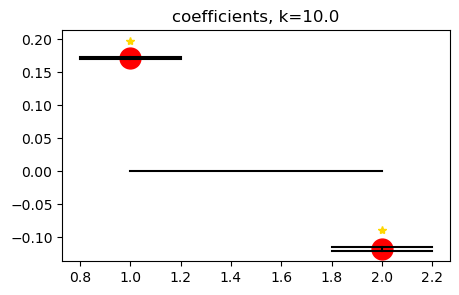

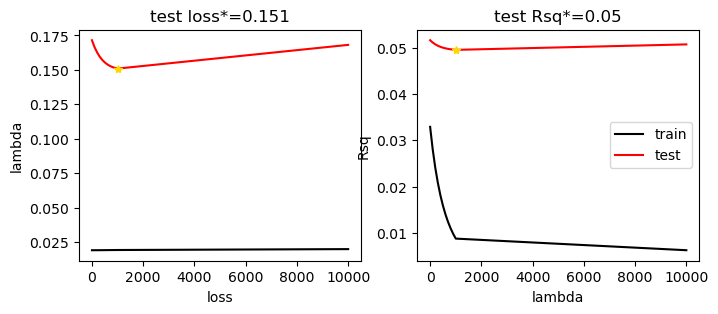

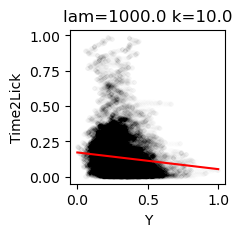

[0.17164333364312592, -0.1179869392671175]
["d0", "d1"]


,predictors,Coeff,StdError,p,CI95_lower,CI95_upper
,String,Float64,Float64,Float64,Float64,Float64
1,th0,0.171643,0.000576302,0.0,0.170514,0.172773
2,Y,-0.117987,0.00147796,0.0,-0.120884,-0.11509


In [441]:
theta_summary(DA_stats_df; Mode = "oneFit", result_df=DA_result_df)
plot_xval_loss(DA_xval_data)
plot_xval_fit_results(DA_result_df,DA_model_summary; modelClass="linear")

In [380]:
xval_data

,k,all_lambdas,lam_star,mean_train_loss_ea_lam,mean_test_loss_ea_lam,mean_train_Rsq_ea_lam,mean_test_Rsq_ea_lam
,Int64,Array…,Float64,Array…,Array…,Array…,Array…
1,10,"[0.0, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0]",900.0,"[0.0192076, 0.0192076, 0.0192076, 0.0192076, 0.0192076, 0.0192076, 0.0192076, 0.0192117, 0.0193677, 0.0200118, 0.0192117, 0.019222, 0.0192364, 0.0192532, 0.0192715, 0.0192906, 0.0193101, 0.0193295, 0.0193488, 0.0193677]","[0.171514, 0.171514, 0.171514, 0.171514, 0.171509, 0.171459, 0.170962, 0.166556, 0.150937, 0.168139, 0.166556, 0.162678, 0.159644, 0.157271, 0.15542, 0.153982, 0.152874, 0.15203, 0.151398, 0.150937]","[0.0329118, 0.0329118, 0.0329118, 0.0329113, 0.0329064, 0.032858, 0.0323782, 0.0280524, 0.00877614, 0.00626854, 0.0280524, 0.0240952, 0.0208404, 0.0181393, 0.0158794, 0.0139747, 0.0123588, 0.0109797, 0.00979639, 0.00877614]","[0.0516144, 0.0516144, 0.0516144, 0.0516143, 0.0516138, 0.0516087, 0.0515578, 0.0511111, 0.0495328, 0.0507132, 0.0511111, 0.0507237, 0.050423, 0.0501881, 0.0500039, 0.0498591, 0.0497452, 0.049656, 0.0495864, 0.0495328]"


In [385]:
lam_star = xval_data.lam_star
all_lambdas = xval_data.all_lambdas[1]

20-element Array{Float64,1}:
     0.0
     0.00010000000000000002
     0.0010000000000000002
     0.010000000000000002
     0.1
     1.0
    10.0
   100.0
  1000.0
 10000.0
   100.0
   200.0
   300.0
   400.0
   500.0
   600.0
   700.0
   800.0
   900.0
  1000.0

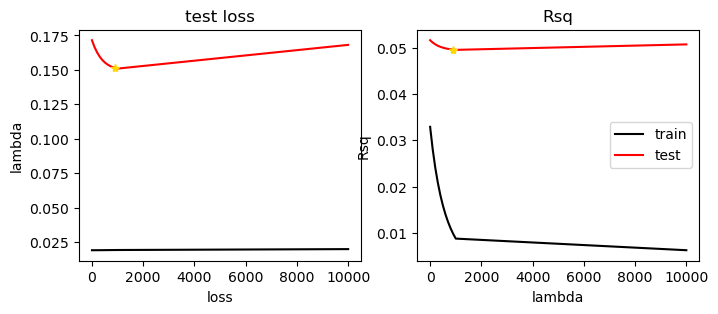

PyObject <matplotlib.legend.Legend object at 0x130282820>

In [389]:
plot_xval_loss(xval_data)

In [388]:
refresh_tools("function_library")
curr_dir = pwd()

Refreshed cluster_modules.jl feedback_modules.jl file_modules.jl math_modules.jl modeling_tools.jl plotting_tools.jl probabilistic_modules.jl 

"/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models"

In [319]:
model_summary

,predictors,Coeff,StdError,p,CI95_lower,CI95_upper
,String,Float64,Float64,Float64,Float64,Float64
1,th0,0.1737,0.000597892,0.0,0.172528,0.174872
2,Y,-0.124358,0.00156535,0.0,-0.127426,-0.12129


In [326]:
names(result_df)

14-element Array{Symbol,1}:
 :predictors
 :predicted
 :th
 :X
 :y
 :lam
 :yFit
 :CVmat
 :se_model
 :se_th
 :signifCoeff
 :ESS
 :RSS
 :Rsq

In [343]:
vcat(result_df.y[1],)

1×123510 Array{Float64,2}:
 0.100126  0.140004  0.0478107  0.251166  0.0282634  0.166992  0.235987  0.295947  0.0248043  0.103448  0.920367  0.091223  0.515018  0.0366248  0.0789546  0.200569  0.148067  0.160752  0.0897983  0.0858104  0.0608257  0.207163  0.00866006  0.0645336  0.242488  0.0801304  0.114061  0.215431  0.156484  0.33126  0.164672  0.0696724  0.0388769  0.0771815  0.252989  0.198093  0.227183  0.147725  0.0438602  0.0265961  0.25554  0.107361  0.144658  0.348474  0.0627356  0.0945825  0.346446  0.112388  …  0.0733118  0.126809  0.0824509  0.124383  0.00926352  0.0890953  0.498221  0.0386418  0.14136  0.348841  0.123779  0.16889  0.0824136  0.0651308  0.0333773  0.174514  0.00146201  0.188947  0.0103211  0.0682415  0.103267  0.0442335  0.252243  0.417294  0.175061  0.12335  0.014589  0.11156  0.0135811  0.123717  0.188132  0.246924  0.227557  0.0243813  0.0394306  0.103317  0.0485075  0.518471  0.106963  0.0833841  0.0553323  0.535629  0.0755702  0.0728701  0.172367  0.01

In [320]:
stats_df

,th_names,n,th,se_th,std_th,dof,p_t,CImin_t,CImax_t,p_z,CImin_z,CImax_z
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,th0,123510.0,0.1737,0.000597892,0.210123,123508.0,0.0,0.172528,0.174872,0.0,0.172528,0.174872
2,Y,123510.0,-0.124358,0.00156535,0.550128,123508.0,0.0,-0.127426,-0.12129,0.0,-0.127426,-0.12129


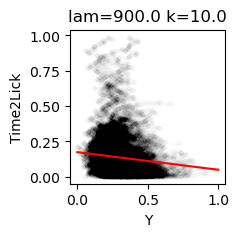

,predictors,Coeff,StdError,p,CI95_lower,CI95_upper
,String,Float64,Float64,Float64,Float64,Float64
1,th0,0.1737,0.000597892,0.0,0.172528,0.174872
2,Y,-0.124358,0.00156535,0.0,-0.127426,-0.12129


In [375]:
plot_xval_fit_results(result_df,model_summary; modelClass="linear")

# All datapoints used in the OUTCOME only model finds test loss of 0.019 (mean 0.286 on test)

In [395]:
pn=[:Rxn_1back, :Early_1back, :Reward_1back, :ITI_1back, :Rxn_2back, :Early_2back, :Reward_2back, :ITI_2back]
(oc_result_df, oc_model_summary, oc_stats_df,oc_xval_data) = 
    kfold_xval(run_regression; yID=:Time2Lick, predictornames=pn, 
    k_sets=ksets, modelName="Xvalidated_oc-T2L_model", verbose=false);

========== k-folds xvalidation 2021-01-21_1928==========
	Loss function not specified, using MSE Loss (linear model)
Testing lam = [0.0  0.0  0.001  0.01  0.1  1.0  10.0  100.0  1000.0  10000.0  ] 2021-01-21_1928
Testing lam = [1000.0  2000.0  3000.0  4000.0  5000.0  6000.0  7000.0  8000.0  9000.0  10000.0  ] 2021-01-21_1928
Testing lam = [3000.0  3111.111  3222.222  3333.333  3444.444  3555.556  3666.667  3777.778  3888.889  4000.0  ] 2021-01-21_1928
 
Best lam was 3666.6666666666665 after 3 tries. Breaking
Fitting with best lambda and getting final model...
 	Lam=3666.6666666666665
	Loss=0.019
	Rsq=0.041


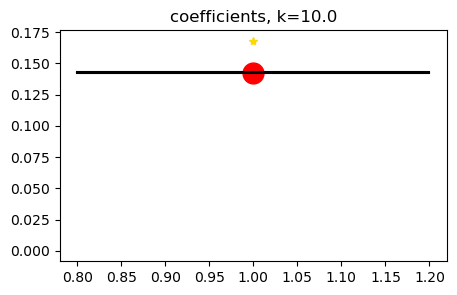

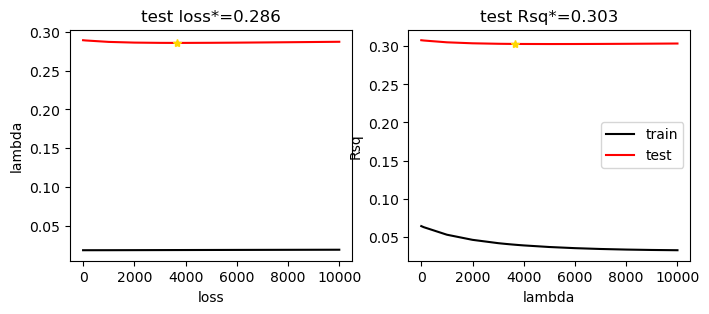

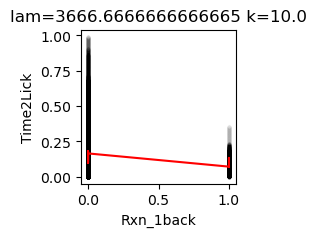

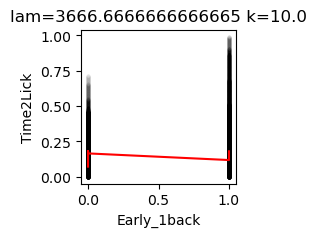

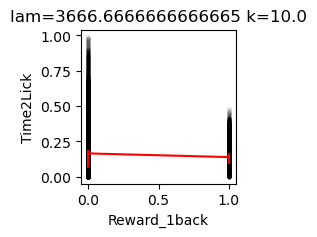

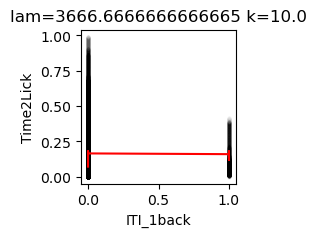

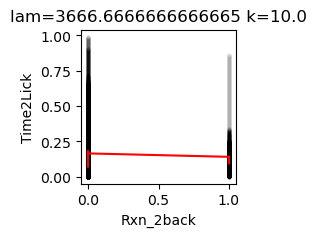

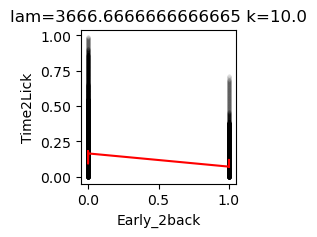

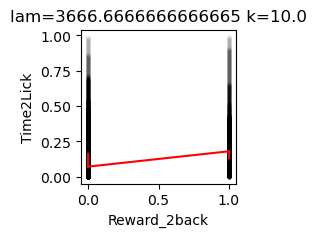

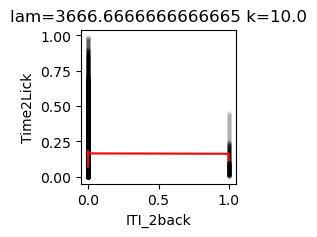

0.14250588483184484
["d0"]


,predictors,Coeff,StdError,p,CI95_lower,CI95_upper
,String,Float64,Float64,Float64,Float64,Float64
1,th0,0.142506,0.000282927,0.0,0.141951,0.14306
2,Rxn_1back,-0.0316598,0.000293077,0.0,-0.0322343,-0.0310854
3,Early_1back,0.0149439,0.000337382,0.0,0.0142827,0.0156052
4,Reward_1back,-0.0045517,0.000343558,4.88834e-40,-0.00522507,-0.00387833
5,ITI_1back,0.0161995,0.000196411,0.0,0.0158145,0.0165844
6,Rxn_2back,-0.0176119,0.000315548,0.0,-0.0182304,-0.0169934
7,Early_2back,-0.0404234,0.000337667,0.0,-0.0410853,-0.0397616
8,Reward_2back,0.0214338,0.000344767,0.0,0.0207581,0.0221095
9,ITI_2back,0.00403446,0.000166858,7.39862e-129,0.00370742,0.0043615


In [410]:
theta_summary(oc_stats_df; Mode = "oneFit", result_df=oc_result_df)
plot_xval_loss(oc_xval_data)
plot_xval_fit_results(oc_result_df,oc_model_summary; modelClass="linear")


In [421]:
refresh_tools("function_library")

Refreshed cluster_modules.jl feedback_modules.jl file_modules.jl math_modules.jl modeling_tools.jl plotting_tools.jl probabilistic_modules.jl 

# All datapoints used in the DA+OUTCOME model finds test loss of 0.019 (mean 0.286 on test)

In [442]:
pn=[:Y, :Rxn_1back, :Early_1back, :Reward_1back, :ITI_1back, :Rxn_2back, :Early_2back, :Reward_2back, :ITI_2back]
(all_result_df, all_model_summary, all_stats_df,all_xval_data) = 
    kfold_xval(run_regression; yID=:Time2Lick, predictornames=pn, 
    k_sets=ksets, modelName="Xvalidated_all-T2L_model", verbose=false);

========== k-folds xvalidation 2021-01-21_2041==========
	Loss function not specified, using MSE Loss (linear model)
Testing lam = [0.0  0.0  0.001  0.01  0.1  1.0  10.0  100.0  1000.0  10000.0  ] 2021-01-21_2041
 
Best lam was 10000.0 and difference in loss with next lower lam is < 1%. Breaking
Fitting with best lambda and getting final model...
 	Lam=10000.0
	Loss=0.019
	Rsq=0.032


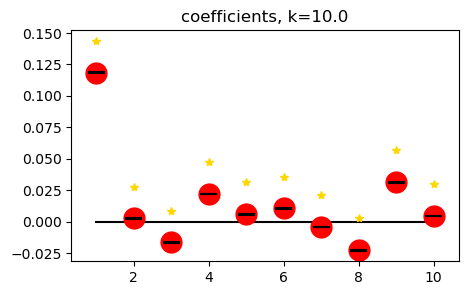

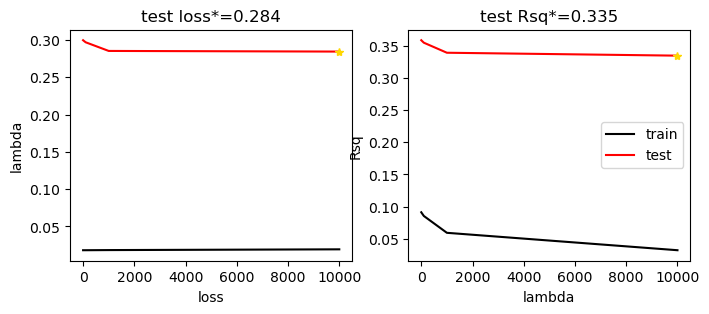

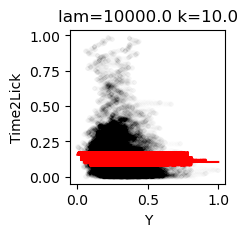

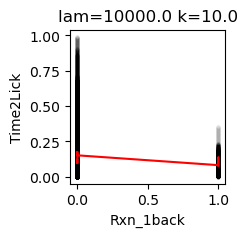

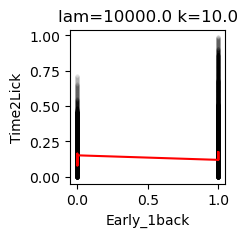

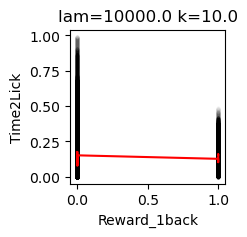

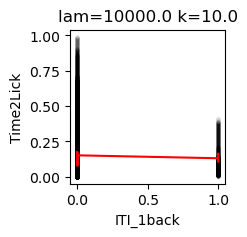

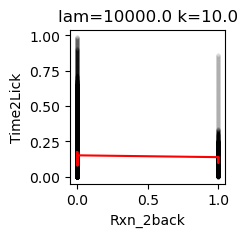

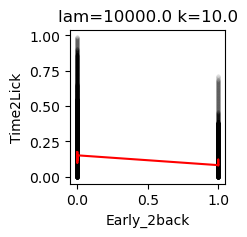

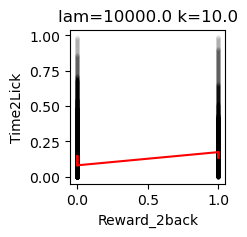

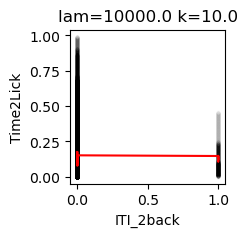

[0.11847357003281178, 0.002620090540662063, -0.016333578327789287, 0.02205596040054336, 0.005990231625479292, 0.010607223106362747, -0.004200737420322731, -0.022757880819152254, 0.03134194071306597, 0.004465225801085162]
["d0", "d1", "d2", "d3", "d4", "d5", "d6", "d7", "d8", "d9"]


,predictors,Coeff,StdError,p,CI95_lower,CI95_upper
,String,Float64,Float64,Float64,Float64,Float64
1,th0,0.118474,0.000174603,0.0,0.118131,0.118816
2,Y,0.00262009,7.51019e-5,2.3022e-265,0.00247289,0.00276729
3,Rxn_1back,-0.0163336,0.000116099,0.0,-0.0165611,-0.016106
4,Early_1back,0.022056,0.000177495,0.0,0.0217081,0.0224038
5,Reward_1back,0.00599023,0.000159349,1.62471e-307,0.00567791,0.00630255
6,ITI_1back,0.0106072,6.94661e-5,0.0,0.0104711,0.0107434
7,Rxn_2back,-0.00420074,0.000131956,1.7196e-221,-0.00445937,-0.00394211
8,Early_2back,-0.0227579,0.000176195,0.0,-0.0231032,-0.0224125
9,Reward_2back,0.0313419,0.00016718,0.0,0.0310143,0.0316696


In [443]:
theta_summary(all_stats_df; Mode = "oneFit", result_df=all_result_df)
plot_xval_loss(all_xval_data)
plot_xval_fit_results(all_result_df,all_model_summary; modelClass="linear")

In [417]:
all_model_summary

,predictors,Coeff,StdError,p,CI95_lower,CI95_upper
,String,Float64,Float64,Float64,Float64,Float64
1,th0,0.118474,0.000174603,0.0,0.118131,0.118816
2,Y,0.00262009,7.51019e-5,2.3022e-265,0.00247289,0.00276729
3,Rxn_1back,-0.0163336,0.000116099,0.0,-0.0165611,-0.016106
4,Early_1back,0.022056,0.000177495,0.0,0.0217081,0.0224038
5,Reward_1back,0.00599023,0.000159349,1.62471e-307,0.00567791,0.00630255
6,ITI_1back,0.0106072,6.94661e-5,0.0,0.0104711,0.0107434
7,Rxn_2back,-0.00420074,0.000131956,1.7196e-221,-0.00445937,-0.00394211
8,Early_2back,-0.0227579,0.000176195,0.0,-0.0231032,-0.0224125
9,Reward_2back,0.0313419,0.00016718,0.0,0.0310143,0.0316696


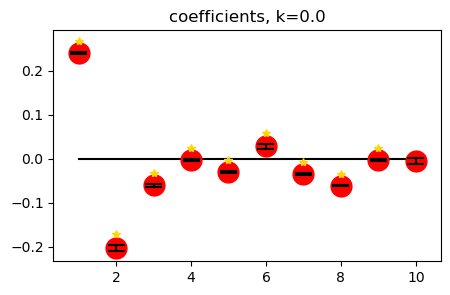

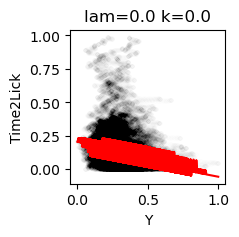

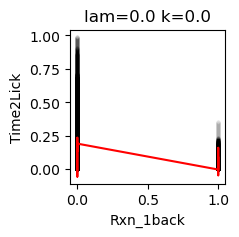

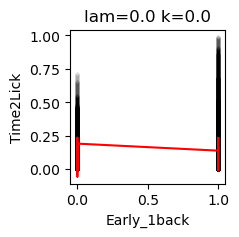

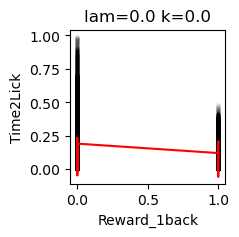

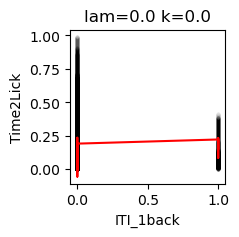

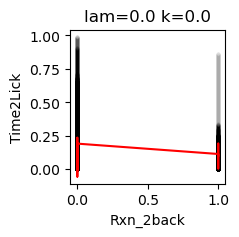

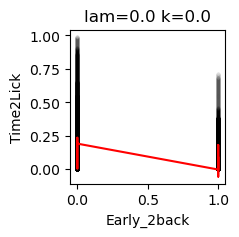

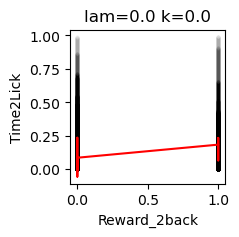

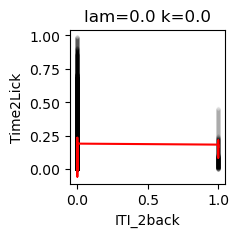

	Loss=0.018
	Rsq=0.091
[0.2405685591379439, -0.20311146188550233, -0.06039254800974976, -0.0026728179542195338, -0.031202775410778563, 0.028462494152078757, -0.03486212454933651, -0.061104135006208364, -0.002612199933354366, -0.005737960730847556]
["d0", "d1", "d2", "d3", "d4", "d5", "d6", "d7", "d8", "d9"]


,predictors,Coeff,StdError,p,CI95_lower,CI95_upper
,String,Float64,Float64,Float64,Float64,Float64
1,th0,0.240569,0.00146617,0.0,0.237695,0.243442
2,Y,-0.203111,0.00334057,0.0,-0.209659,-0.196564
3,Rxn_1back,-0.0603925,0.00166662,5.19191e-286,-0.0636591,-0.057126
4,Early_1back,-0.00267282,0.00102454,0.00908707,-0.0046809,-0.00066474
5,Reward_1back,-0.0312028,0.00118379,1.09101e-152,-0.033523,-0.0288826
6,ITI_1back,0.0284625,0.00270596,7.28579e-26,0.0231589,0.0337661
7,Rxn_2back,-0.0348621,0.00150413,1.37549e-118,-0.0378102,-0.0319141
8,Early_2back,-0.0611041,0.00107586,0.0,-0.0632128,-0.0589955
9,Reward_2back,-0.0026122,0.00114636,0.0226869,-0.00485904,-0.000365358


In [431]:
pn=[:Y, :Rxn_1back, :Early_1back, :Reward_1back, :ITI_1back, :Rxn_2back, :Early_2back, :Reward_2back, :ITI_2back]
(NoXval_all_result_df, NoXval_all_model_summary, NoXval_all_stats_df, allsets) = 
no_xval_control(run_regression; 
    predictornames=pn, yID=:Time2Lick, k_sets=ksets, modelName="NOTxval", lam=0.0, add_th0=true);   
theta_summary(NoXval_all_stats_df; Mode = "oneFit", result_df=NoXval_all_result_df)
plot_xval_fit_results(NoXval_all_result_df,NoXval_all_model_summary; modelClass="linear")

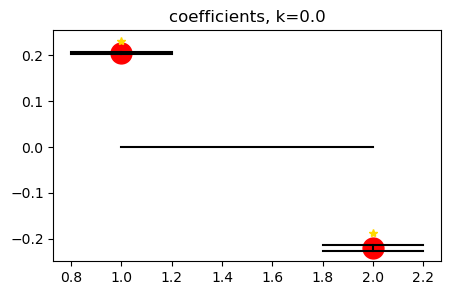

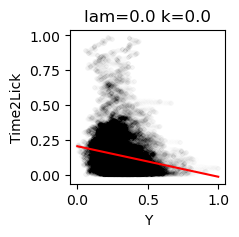

	Loss=0.019
	Rsq=0.033
[0.2037171453664981, -0.21913942035750444]
["d0", "d1"]


,predictors,Coeff,StdError,p,CI95_lower,CI95_upper
,String,Float64,Float64,Float64,Float64,Float64
1,th0,0.203717,0.00109856,0.0,0.201564,0.20587
2,Y,-0.219139,0.00338012,0.0,-0.225764,-0.212514


In [432]:
pn=[:Y]
(NoXval_DA_result_df, NoXval_DA_model_summary, NoXval_DA_stats_df, allsets) = 
no_xval_control(run_regression; 
    predictornames=pn, yID=:Time2Lick, k_sets=ksets, modelName="NOTxvalDA", lam=0.0, add_th0=true);   
theta_summary(NoXval_DA_stats_df; Mode = "oneFit", result_df=NoXval_DA_result_df)
plot_xval_fit_results(NoXval_DA_result_df,NoXval_DA_model_summary; modelClass="linear")

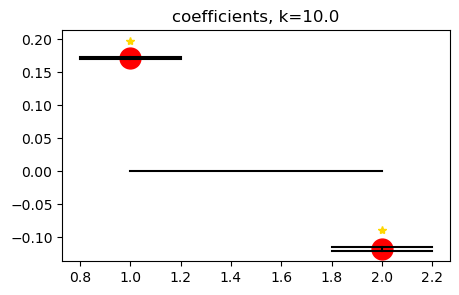

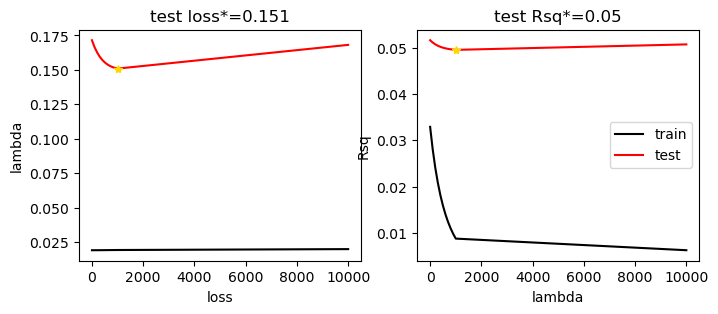

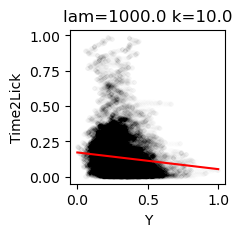

========== k-folds xvalidation 2021-01-21_2018==========
	Loss function not specified, using MSE Loss (linear model)
Testing lam = [0.0  0.0  0.001  0.01  0.1  1.0  10.0  100.0  1000.0  10000.0  ] 2021-01-21_2018
Testing lam = [100.0  200.0  300.0  400.0  500.0  600.0  700.0  800.0  900.0  1000.0  ] 2021-01-21_2018
 
Best lam was 900.0 after 2 tries. Breaking
Fitting with best lambda and getting final model...
 	Lam=1000.0
	Loss=0.019
	Rsq=0.01
[0.17164333364312592, -0.1179869392671175]
["d0", "d1"]


,predictors,Coeff,StdError,p,CI95_lower,CI95_upper
,String,Float64,Float64,Float64,Float64,Float64
1,th0,0.171643,0.000576302,0.0,0.170514,0.172773
2,Y,-0.117987,0.00147796,0.0,-0.120884,-0.11509


In [433]:
pn=[:Y]
(DA_result_df, DA_model_summary, DA_stats_df,DA_xval_data) = 
    kfold_xval(run_regression; yID=:Time2Lick, predictornames=pn, 
    k_sets=ksets, modelName="Xvalidated_DA-T2L_model", verbose=false);
theta_summary(DA_stats_df; Mode = "oneFit", result_df=DA_result_df)
plot_xval_loss(DA_xval_data)
plot_xval_fit_results(DA_result_df,DA_model_summary; modelClass="linear")

# What about the sparse-sampled sets?

In [437]:
one_per_trial_dfs = get_k_1pt_datasets(b5d13_norm_df_m150, threshold_retention=0.75);

477 trials avail initially.
     
477 476 475 472 469 469 466 464 462 462 457 454 451 449 448 447 445 444 442 441 438 435 433 431 431 429 428 427 427 427 427 427 424 422 422 422 421 421 420 420 420 420 420 420 418 416 416 415 414 414 413 413 412 412 412 412 412 411 411 411 411 410 409 408 408 406 406 405 405 404 403 403 403 403 402 402 400 399 397 397 396 395 394 394 394 392 390 389 389 389 389 388 387 387 386 385 385 385 383 381 381 381 381 380 378 378 377 377 377 377 375 373 372 372 371 370 370 370 370 368 366 365 364 363 361 360 360  
 
Found 127 one-point-per-trial datasets with at least 357.75 trials


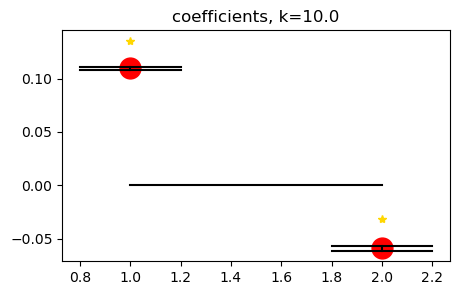

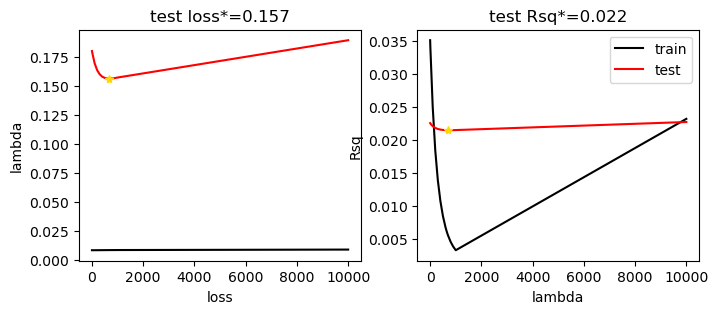

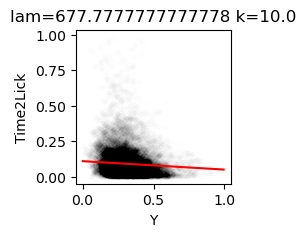

========== k-folds xvalidation 2021-01-21_2024==========
	Loss function not specified, using MSE Loss (linear model)
Testing lam = [0.0  0.0  0.001  0.01  0.1  1.0  10.0  100.0  1000.0  10000.0  ] 2021-01-21_2024
********************************************************************************************
********************************************************************************************
Testing lam = [100.0  200.0  300.0  400.0  500.0  600.0  700.0  800.0  900.0  1000.0  ] 2021-01-21_2024
Testing lam = [600.0  611.111  622.222  633.333  644.444  655.556  666.667  677.778  688.889  700.0  ] 2021-01-21_2025
 
Best lam was 677.7777777777778 after 3 tries. Breaking
Fitting with best lambda and getting final model...
 	Lam=677.7777777777778
	Loss=0.008
	Rsq=0.006
[0.10938689934082581, -0.05925811247956833]
["d0", "d1"]


,predictors,Coeff,StdError,p,CI95_lower,CI95_upper
,String,Float64,Float64,Float64,Float64,Float64
1,th0,0.109387,0.000499214,0.0,0.108408,0.110365
2,Y,-0.0592581,0.00111341,0.0,-0.0614404,-0.0570758


In [438]:
pn=[:Y]
(DA_1pt_result_df, DA_1pt_model_summary, DA_1pt_stats_df,DA_1pt_xval_data) = 
    kfold_xval(run_regression; yID=:Time2Lick, predictornames=pn, 
    k_sets=one_per_trial_dfs, modelName="Xvalidated_DA_1pt-T2L_model", verbose=false);
theta_summary(DA_1pt_stats_df; Mode = "oneFit", result_df=DA_result_df)
plot_xval_loss(DA_1pt_xval_data)
plot_xval_fit_results(DA_1pt_result_df,DA_1pt_model_summary; modelClass="linear")

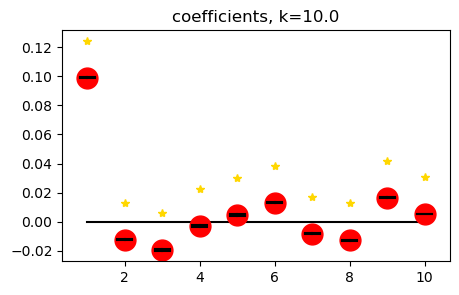

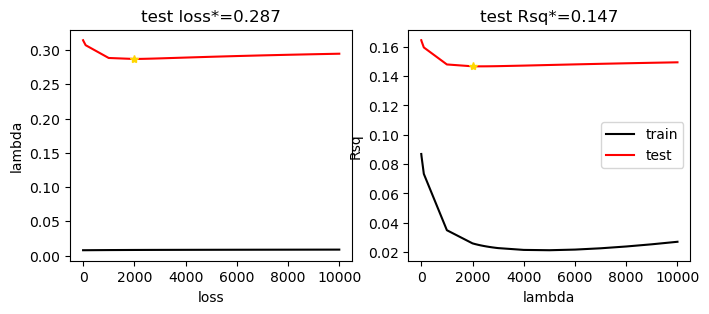

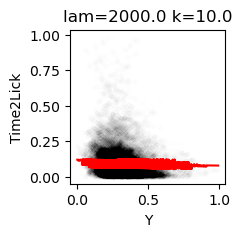

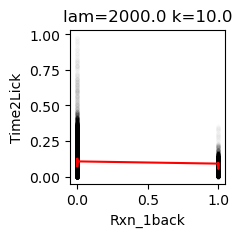

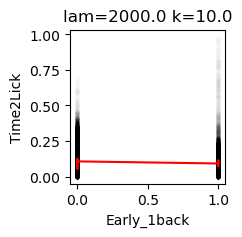

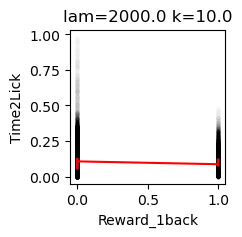

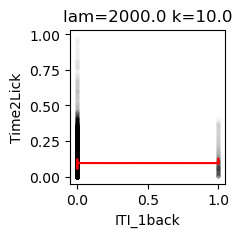

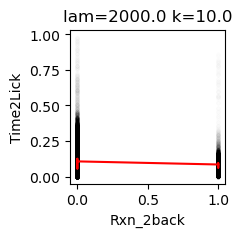

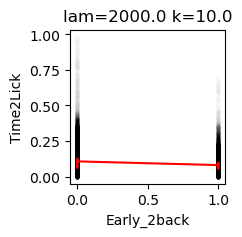

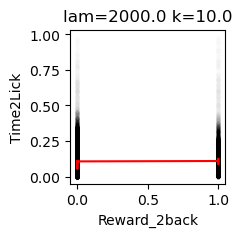

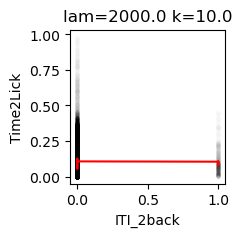

========== k-folds xvalidation 2021-01-21_2028==========
	Loss function not specified, using MSE Loss (linear model)
Testing lam = [0.0  0.0  0.001  0.01  0.1  1.0  10.0  100.0  1000.0  10000.0  ] 2021-01-21_2028
********************************************************************************************
********************************************************************************************
********************************************************************************************
********************************************************************************************
********************************************************************************************
********************************************************************************************
********************************************************************************************
********************************************************************************************
*******************************************

,predictors,Coeff,StdError,p,CI95_lower,CI95_upper
,String,Float64,Float64,Float64,Float64,Float64
1,th0,0.0989235,0.000231702,0.0,0.0984694,0.0993776
2,Y,-0.0122088,0.00013067,0.0,-0.0124649,-0.0119527
3,Rxn_1back,-0.0194638,0.000246114,0.0,-0.0199462,-0.0189814
4,Early_1back,-0.00271995,0.000279908,2.6587e-22,-0.00326857,-0.00217133
5,Reward_1back,0.00454741,0.000272252,1.81786e-62,0.00401379,0.00508103
6,ITI_1back,0.0131967,0.000120642,0.0,0.0129602,0.0134331
7,Rxn_2back,-0.00817396,0.000251488,2.00344e-229,-0.00866687,-0.00768104
8,Early_2back,-0.0128675,0.000278439,0.0,-0.0134132,-0.0123217
9,Reward_2back,0.0165441,0.000274908,0.0,0.0160052,0.0170829


In [439]:
pn=[:Y, :Rxn_1back, :Early_1back, :Reward_1back, :ITI_1back, :Rxn_2back, :Early_2back, :Reward_2back, :ITI_2back]
(all_1pt_result_df, all_1pt_model_summary, all_1pt_stats_df,all_1pt_xval_data) = 
    kfold_xval(run_regression; yID=:Time2Lick, predictornames=pn, 
    k_sets=one_per_trial_dfs, modelName="Xvalidated_all_1pt-T2L_model", verbose=false);
theta_summary(all_1pt_stats_df; Mode = "oneFit", result_df=all_result_df)
plot_xval_loss(all_1pt_xval_data)
plot_xval_fit_results(all_1pt_result_df,all_1pt_model_summary; modelClass="linear")

In [435]:
refresh_tools("function_library")

Refreshed cluster_modules.jl feedback_modules.jl file_modules.jl math_modules.jl modeling_tools.jl plotting_tools.jl probabilistic_modules.jl 

# Hm, I'm not sure here...

- fix loss plot label
- fix lambda optimized going into final model
- try adding baseline
- try adding history (convolution)
- figure out what's up with the test Rsq being so weird
- split up into percentage of interval (early in the interval may not be as informative)

- averaging aligned on where you find the step
- looking at variance as fxn of time
- predict the movement time distribution from sigmoid model

Not too surprising that one point might not be very informative...